# Advertising Sales Channel Prediction

Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel.

Prediction:

The total sales generated from all the sales channel.

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Unnamed:0 is the unnecessary column, so that we can drop that column before starting the process.

In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.sample(5)

,TV,radio,newspaper,sales
175,276.9,48.9,41.8,27.0
122,224.0,2.4,15.6,11.6
81,239.8,4.1,36.9,12.3
130,0.7,39.6,8.7,1.6
192,17.2,4.1,31.6,5.9


In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


# Checking Null Values

In [8]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


<AxesSubplot:>

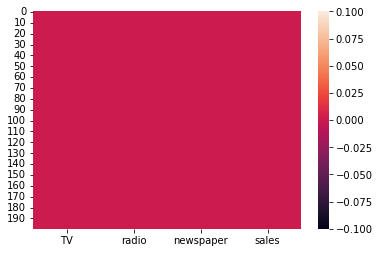

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum().sum()

0

We don't have any Null Values so we can proceed further.

# DataFrame Description

The dataset contains the data of TV, radio, newspaper.

Sales is the Target variable.

# Checking the datatypes of the columns

In [11]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the datatypes are in same format, so we don't need any encoding technique here.

# Making DataFrame for the Nominal Data

Deep Copy

In [12]:
df_visualization_nominal=df[['TV','radio','newspaper','sales']].copy()

In [13]:
id(df)

1844513190912

In [14]:
id(df_visualization_nominal)

1844612470336

In [15]:
df_copy=df.copy(deep=False)

In [16]:
id(df_copy)

1844612530672

In [17]:
df_visualization_nominal.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

# Plottings

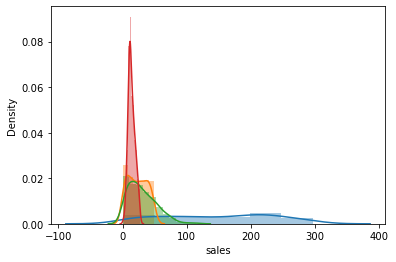

In [18]:
for i in df.columns:
    sns.distplot(df[i])

<AxesSubplot:xlabel='TV', ylabel='Count'>

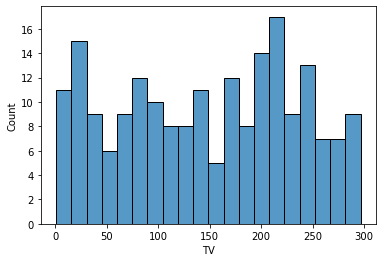

In [19]:
sns.histplot(df['TV'],bins=20)

The value of TV is moderately spreaded between 0-300.

<AxesSubplot:xlabel='radio', ylabel='Count'>

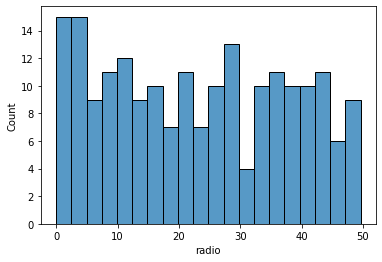

In [20]:
sns.histplot(df['radio'],bins=20)

The value of radio is moderately spreaded between 0 and 50

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

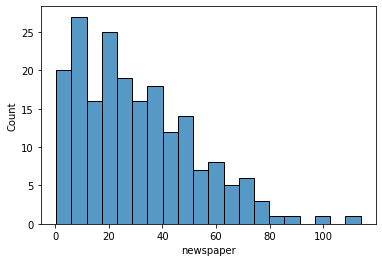

In [21]:
sns.histplot(df['newspaper'],bins=20)

The value of newspaper is spreaded between 0 and 110, highly near 0-50, very lessly near 60-80, two values for 100-110

<AxesSubplot:xlabel='sales', ylabel='Count'>

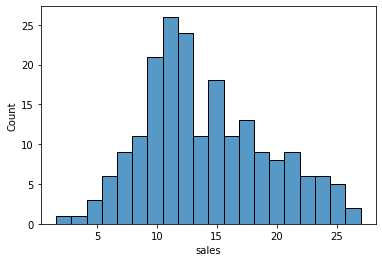

In [22]:
sns.histplot(df['sales'],bins=20)

The value of sales is spreaded highly near 10-15. It will spread between 0-30

<AxesSubplot:xlabel='TV', ylabel='Density'>

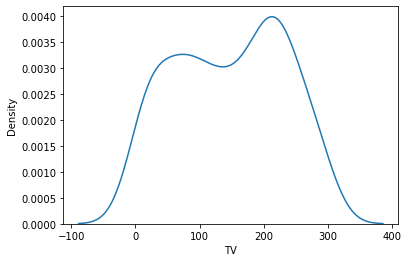

In [23]:
sns.kdeplot(df['TV'])

The TV value is highly distributed.

<AxesSubplot:xlabel='radio', ylabel='Density'>

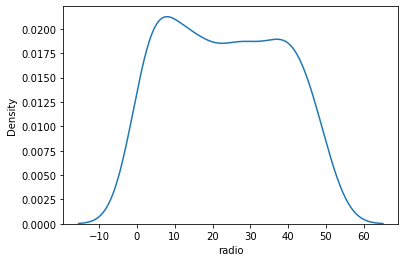

In [24]:
sns.kdeplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

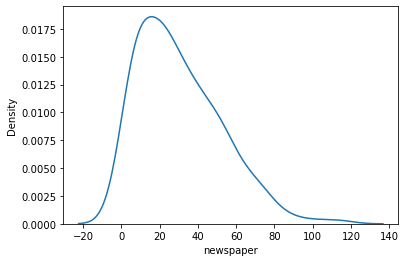

In [25]:
sns.kdeplot(df['newspaper'])

The value of newspaper shows that it is right skewed.

<AxesSubplot:xlabel='sales', ylabel='Density'>

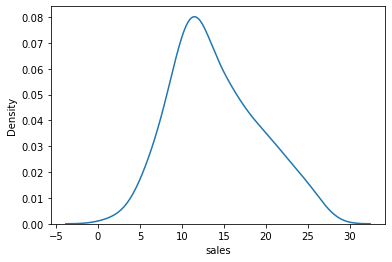

In [26]:
sns.kdeplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='radio'>

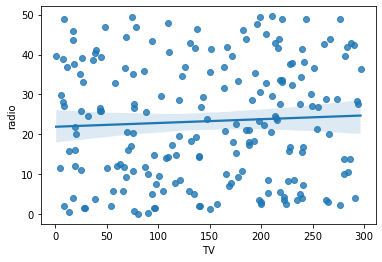

In [27]:
sns.regplot(x='TV', y='radio', data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

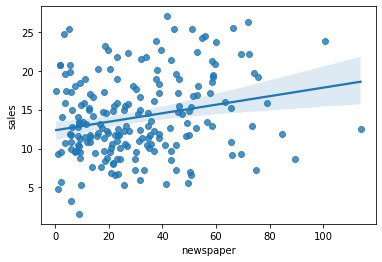

In [28]:
sns.regplot(x='newspaper', y='sales', data=df)

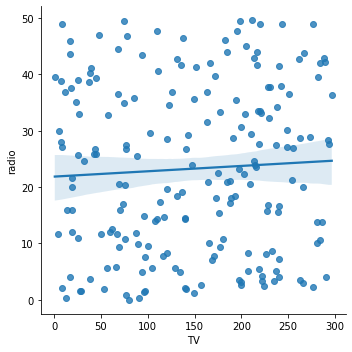

In [29]:
sns.lmplot(x='TV', y='radio', data=df)

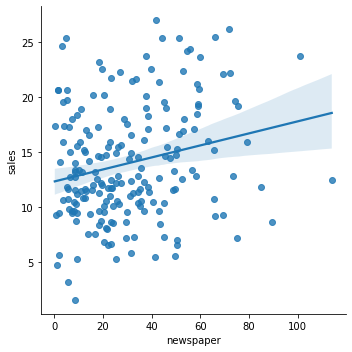

In [30]:
sns.lmplot(x='newspaper', y='sales', data=df)

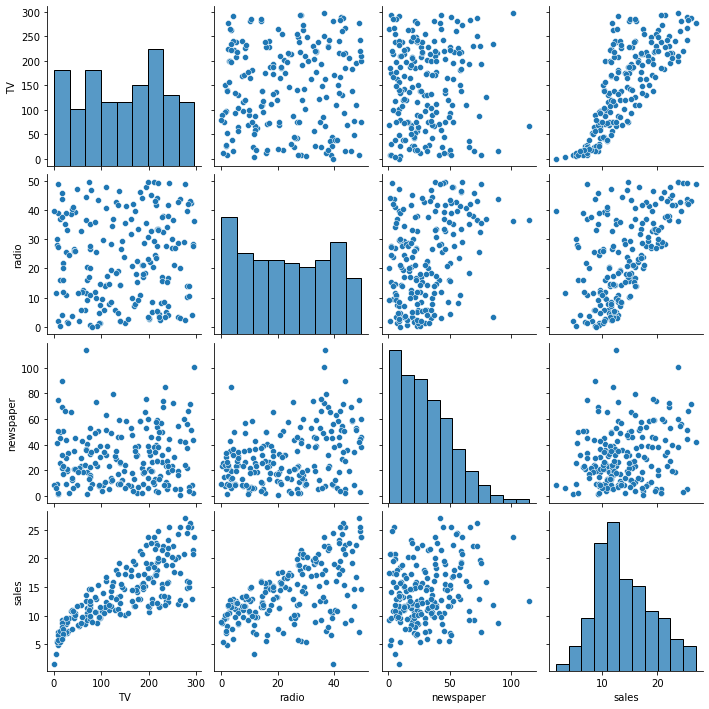

In [31]:
sns.pairplot(df)

# Skewness

In [32]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Describe the Dataset

In [33]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


The max is high when compared to 75th percentile for newspaper.

<AxesSubplot:>

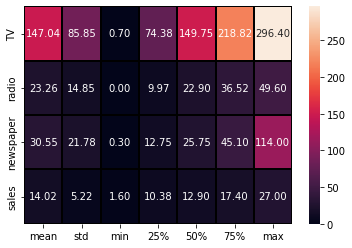

In [35]:
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

# Correlation of the columns with the target columns

In [36]:
df.corr()['sales'].sort_values()

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

<AxesSubplot:>

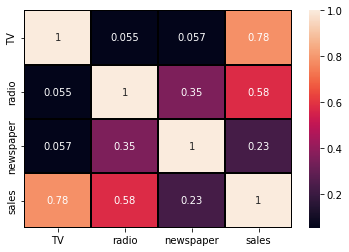

In [37]:
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black")

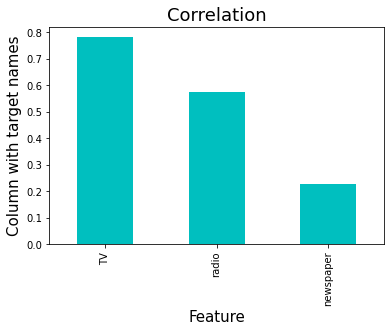

In [38]:
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Column with target names',fontsize=15)
plt.title('Correlation',fontsize=18)
plt.show()

TV is highly positively correlated with the Target variable sales, when compared to radio and newspaper.

In [39]:
df.skew().sort_values()

TV          -0.069853
radio        0.094175
sales        0.407571
newspaper    0.894720
dtype: float64

# Outliers Check

<AxesSubplot:>

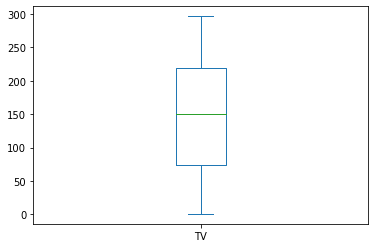

In [40]:
df['TV'].plot.box()

No outliers are present in TV column

<AxesSubplot:>

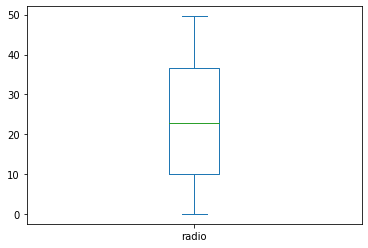

In [41]:
df['radio'].plot.box()

There is no outliers are present in radio.

<AxesSubplot:>

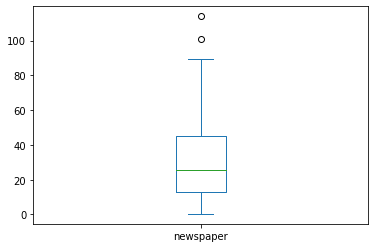

In [42]:
df['newspaper'].plot.box()

outliers are present in newspaper column, we have to remove these outliers before training our model.

<AxesSubplot:>

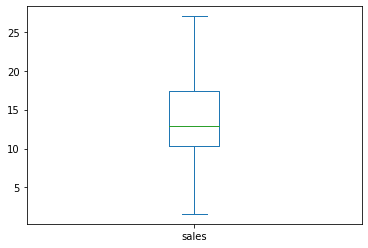

In [43]:
df['sales'].plot.box()

No outliers are present in target variable sales.

# Removing Outliers

In [44]:
from scipy.stats import zscore

dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [45]:
df.shape

(200, 4)

In [46]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)

dfnew.shape= (198, 4)


In [47]:
df=dfnew

In [48]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [49]:
df.shape

(198, 4)

# Seperating the columns into features and Target

In [55]:
features=df.iloc[:,0:-1]
features

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [56]:
target=df.iloc[:,-1]
target

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

# Scaling Technique

Here we use StandarsScaler Method for scaling the dataset.

In [74]:
scale=StandardScaler()
Features_scaled=scale.fit_transform(features)
Features_scaled

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

In [75]:
Features_scaled.shape

(198, 3)

In [98]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

Train the model

In [106]:
features_train.shape

(158, 3)

In [107]:
target_train.shape

(158,)

In [108]:
features_test.shape

(40, 3)

In [109]:
target_test.shape

(40,)

# Linear Regression

In [111]:
lr=LinearRegression()
lr.fit(features_train,target_train)
lr.coef_

array([3.86268812, 2.79181844, 0.02518045])

In [112]:
features=['TV','radio','newspaper']
list(zip(lr.coef_,features))

[(3.862688120818081, 'TV'),
 (2.7918184408218565, 'radio'),
 (0.02518044710921365, 'newspaper')]

In [113]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
TV,3.862688
radio,2.791818
newspaper,0.025180


In [114]:
lr.intercept_

14.009628761627228

In [115]:
lr.score(features_train,target_train)

0.893155890966673

In [116]:
pred=lr.predict(features_test)
pred

array([18.25524456, 17.22393227, 11.99122386, 16.3860073 , 15.70969155,
        6.62237228, 17.00622991, 16.76687161, 12.12173603, 21.62632551,
       18.77296999,  8.64240208, 19.29490037, 23.24873987,  8.18758021,
        9.87862779, 13.92221765,  4.58797102, 17.00588379, 10.48613133,
       19.54446586, 14.81630657, 20.67827257,  7.44191573, 17.85778005,
       24.18979475, 12.50603945,  7.69337376, 13.02863973, 15.23590619,
       10.24439814, 21.49394155, 19.61814108, 11.62528277, 15.47873765,
       12.44218938, 12.66448143, 16.30287294, 20.77720792, 16.32968831])

In [117]:
print("Predicted values", pred)

Predicted values [18.25524456 17.22393227 11.99122386 16.3860073  15.70969155  6.62237228
 17.00622991 16.76687161 12.12173603 21.62632551 18.77296999  8.64240208
 19.29490037 23.24873987  8.18758021  9.87862779 13.92221765  4.58797102
 17.00588379 10.48613133 19.54446586 14.81630657 20.67827257  7.44191573
 17.85778005 24.18979475 12.50603945  7.69337376 13.02863973 15.23590619
 10.24439814 21.49394155 19.61814108 11.62528277 15.47873765 12.44218938
 12.66448143 16.30287294 20.77720792 16.32968831]


In [118]:
preddf=pd.DataFrame(data=pred)
preddf

,0
0,18.255245
1,17.223932
2,11.991224
3,16.386007
4,15.709692
5,6.622372
6,17.006230
7,16.766872
8,12.121736
9,21.626326


In [119]:
lr.score(features_test,target_test)

0.9002147591940638

In [120]:
print("Mean absolute error:", mean_absolute_error(target_test,pred))
print("Mean squared error:", mean_squared_error(target_test,pred))
print("Root mean square:", np.sqrt(mean_squared_error(target_test,pred)))

Mean absolute error: 1.2659015260980557
Mean squared error: 2.65338933827065
Root mean square: 1.6289227539299247


In [122]:
print("R2 Score:", r2_score(target_test,pred))

R2 Score: 0.9002147591940638


# Cross Validation of the model

In [126]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.87988273 0.9176965  0.92510819 0.80845813 0.89565733]
0.8853605756683912
0.04165453399577504


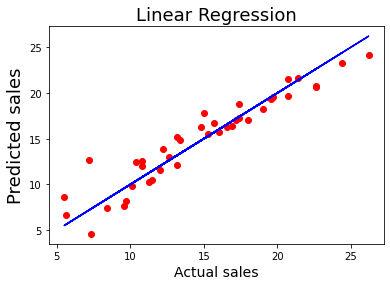

In [153]:
plt.scatter(x=target_test, y=pred, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('Linear Regression', fontsize=18)
plt.savefig('lr.png')
plt.show()

# Regularization

In [137]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

In [139]:
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(features_train,target_train)
rdg.score(features_train,target_train)

0.893155890966324

In [140]:
rdg.coef_

array([3.86268563, 2.7918166 , 0.0251813 ])

In [141]:
cfdf=pd.DataFrame(data=lr.coef_,index=features)
cfdf

,0
TV,3.862688
radio,2.791818
newspaper,0.025180


In [142]:
predict=rdg.predict(features_test)

In [144]:
r2_score(target_test,predict)

0.9002147268086638

In [145]:
lso=Lasso(alpha=.0001,random_state=47)
lso.fit(features_train,target_train)
lso.score(features_train,target_train)

0.8931558901077511

In [146]:
predict1=lso.predict(features_test)

In [147]:
r2_score(target_test,predict1)

0.9002153843964694

# Approaching more Regressors

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

DecisionTree Regression

In [149]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(features_train,target_train)
print('dtc score of DTR:', dtr.score(features_train, target_train))

dtrpredict=dtr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,dtrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,dtrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, dtrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,dtrpredict)))

dtc score of DTR: 1.0
dtc r2_score: 0.9212327479222293
Mean absolute error: 0.9999999999999997
Mean squared error of dtc =  2.094499999999999
Root Mean Squared error of dtc= 1.4472387501722026


Cross Validation of DTR

In [158]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.95827394 0.95216095 0.94177072 0.92929603 0.96139923]
0.9485801753613643
0.011741942288384741


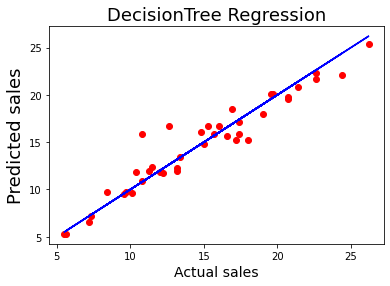

In [155]:
plt.scatter(x=target_test, y=dtrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('DecisionTree Regression', fontsize=18)
plt.savefig('dtr.png')
plt.show()

KNeighbour Regression

In [169]:
knr=KNeighborsRegressor()
knr.fit(features_train,target_train)
print('dtc score of KNR:', dtr.score(features_train, target_train))

knrpredict=knr.predict(features_test)
print('dtc r2_score:', r2_score(target_test,knrpredict))

print("Mean absolute error:", mean_absolute_error(target_test,knrpredict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, knrpredict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,knrpredict)))

dtc score of KNR: 1.0
dtc r2_score: 0.9425944868564552
Mean absolute error: 0.8965000000000003
Mean squared error of dtc =  1.5264700000000004
Root Mean Squared error of dtc= 1.2355039457646424


Cross-validation of KNR

In [159]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(knr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.92676166 0.91057906 0.9090599  0.89469132 0.90185029]
0.9085884467177154
0.01070498431528612


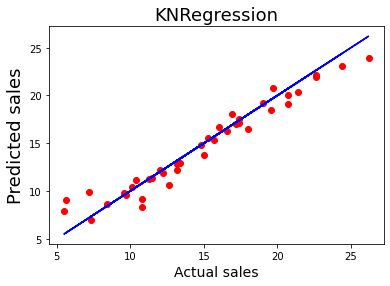

In [156]:
plt.scatter(x=target_test, y=knrpredict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('KNRegression', fontsize=18)
plt.savefig('knr.png')
plt.show()

SupportVector Regression

In [151]:
svr1=SVR()
svr1.fit(features_train,target_train)
print('dtc score of SVR:', dtr.score(features_train, target_train))

svr1predict=svr1.predict(features_test)
print('dtc r2_score:', r2_score(target_test,svr1predict))

print("Mean absolute error:", mean_absolute_error(target_test,svr1predict))
print("Mean squared error of dtc = ", mean_squared_error(target_test, svr1predict))
print("Root Mean Squared error of dtc=", np.sqrt(mean_squared_error(target_test,svr1predict)))

dtc score of SVR: 1.0
dtc r2_score: 0.9031749629532414
Mean absolute error: 1.0064278745652402
Mean squared error of dtc =  2.5746745601103584
Root Mean Squared error of dtc= 1.6045792470645874


Cross-validation of SVR

In [160]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(svr1,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.8504203  0.87587911 0.84989527 0.84605452 0.78548688]
0.8415472179655342
0.029967241435825763


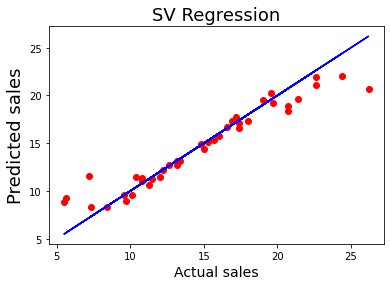

In [157]:
plt.scatter(x=target_test, y=svr1predict, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual sales', fontsize=14)
plt.ylabel('Predicted sales',fontsize=18)
plt.title('SV Regression', fontsize=18)
plt.savefig('svr1.png')
plt.show()

# Ensemble Technique

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [168]:
rf=RandomForestRegressor(criterion="mae",max_features='auto')
rf.fit(features_train,target_train)
train_r2=rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
print('Training r2',train_r2)

rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf, features_train, target_train, cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Training r2 0.9969506579201053
R2 Score: 98.43022949494191
Cross Val Score: 96.96551964164138


# Saving the best model

In [182]:
import joblib

joblib.dump(knr,'knrmodel.obj')

knrloadmodel=joblib.load('knrmodel.obj')
knrloadmodel.predict(features_test)

array([19.24, 17.16,  9.14, 18.08, 16.72,  9.08, 16.44, 15.36, 12.8 ,
       20.38, 17.5 ,  7.9 , 18.5 , 23.06,  9.62, 10.42, 11.92,  6.98,
       16.96, 11.32, 20.74, 12.96, 21.88,  8.68, 13.78, 23.88,  8.32,
        9.8 , 10.62, 12.2 , 11.26, 19.1 , 20.06, 12.18, 15.5 , 11.1 ,
        9.94, 14.84, 22.1 , 16.26])